# GRASS GIS 101: Hop into the Fast Lane with Notebooks!

In this first part, we will:
1. learn the basics of operating in a notebook environment
2. start GRASS GIS
3. repeat Parts 1 and 2 of this workshop but with code

## 1. Notebook environment

By default all cells are running Python:

In [ ]:
import sys
v = sys.version_info
print(f"We are using Python {v.major}.{v.minor}.{v.micro}")

We can also use `!` to run individual lines in the terminal.

In [ ]:
!echo Howdy

Here are some useful keyboard shortcuts in notebooks:

* `shift - enter` execute cell
* `alt - enter` execute cell and insert new below
* `esc` exit cursor/edit mode and enter command mode
* `a` add cell above
* `b` add cell below
* `dd` delete cell
* `x` cut selected cells
* `c` copy selected cells
* `v` paste cells below
* `m` change cell to Markdown
* `y` change cell to Code

Try a few below!

Markdown cells (such as this one) don't execute code but they **can** contain _nice_ formatting.

They can also include `code` snippets:

```
def hello(name):
    print(f"hello {name}")
```

# And Titles
## Headings
### Subheadings
#### and Sub-subheadings

<div class="alert alert-info">
... and HTML formatting
</div>


... and even LaTex!

$
f(x) = \int_{-\infty}^{\infty} e^{-x^2} dx
$

## 2. Starting GRASS GIS

Import Python standard library and IPython packages we need.

In [8]:
import subprocess
import sys
from pathlib import Path

We're going to import the GRASS GIS python API (`grass.script`) and the GRASS GIS Jupyter package (`grass.jupyter`). But first, we need to find the path to those packages using the `--config python_path` command. We use `subprocess.check_output` to find the path and `sys.path.append` to add it to the path.

In [9]:
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True, shell=False).strip()
)

And now we can import the GRASS python packages!

In [10]:
# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

**We'll have to repeat the commands above every time we want to start a GRASS session in a notebook.**

## 3. Create a new project

In [42]:
gs.create_project("NC_Sentinel", epsg=3358, overwrite=True) # Warning! Overwrite=True will delete any all existing data in the project! Use carefully...

## 3. Start GRASS Session

In [43]:
# Start GRASS Session
session = gj.init("./NC_Sentinel/PERMANENT")

We've launched GRASS GIS now! We can access GRASS GIS commands using the command line interface (with the `!` line magic):

In [38]:
!g.version

GRASS 8.4.0dev (2024)


In [44]:
!g.region -p

projection: 99 (NAD83(HARN) / North Carolina)
zone:       0
datum:      nad83harn
ellipsoid:  grs80
north:      1
south:      0
west:       0
east:       1
nsres:      1
ewres:      1
rows:       1
cols:       1
cells:      1


In [ ]:
!r.univar --help

## 3. Importing data

<div class="alert alert-info">
Download <a href="https://grass.osgeo.org/sampledata/north_carolina/nc_sentinel_utm17n.zip">these Sentinel-2 images</a>. Put the unzipped download in this directory.
</div>

Since we have several files to import, we can make a Python for-loop to import them all.

In [45]:
files = sorted(Path('./nc_sentinel_utm17n/S2A_MSIL2A_20220304T160151_N0400_R097_T17SQV_20220304T215812.SAFE/GRANULE/L2A_T17SQV_A034986_20220304T160221/IMG_DATA/R10m').glob('*.jp2'))
files

[PosixPath('nc_sentinel_utm17n/S2A_MSIL2A_20220304T160151_N0400_R097_T17SQV_20220304T215812.SAFE/GRANULE/L2A_T17SQV_A034986_20220304T160221/IMG_DATA/R10m/T17SQV_20220304T160151_AOT_10m.jp2'),
 PosixPath('nc_sentinel_utm17n/S2A_MSIL2A_20220304T160151_N0400_R097_T17SQV_20220304T215812.SAFE/GRANULE/L2A_T17SQV_A034986_20220304T160221/IMG_DATA/R10m/T17SQV_20220304T160151_B02_10m.jp2'),
 PosixPath('nc_sentinel_utm17n/S2A_MSIL2A_20220304T160151_N0400_R097_T17SQV_20220304T215812.SAFE/GRANULE/L2A_T17SQV_A034986_20220304T160221/IMG_DATA/R10m/T17SQV_20220304T160151_B03_10m.jp2'),
 PosixPath('nc_sentinel_utm17n/S2A_MSIL2A_20220304T160151_N0400_R097_T17SQV_20220304T215812.SAFE/GRANULE/L2A_T17SQV_A034986_20220304T160221/IMG_DATA/R10m/T17SQV_20220304T160151_B04_10m.jp2'),
 PosixPath('nc_sentinel_utm17n/S2A_MSIL2A_20220304T160151_N0400_R097_T17SQV_20220304T215812.SAFE/GRANULE/L2A_T17SQV_A034986_20220304T160221/IMG_DATA/R10m/T17SQV_20220304T160151_B08_10m.jp2')]

In [47]:
for file in files[1:]:
    name = str(file)[-11:-4]
    print("importing " + name)
    gs.run_command("r.import", input=file, output=name)

importing B02_10m
importing B03_10m
importing B04_10m
importing B08_10m


Let's look at the available data in our location:

In [48]:
!g.list type=raster,vector -m -t

raster/B02_10m@PERMANENT
raster/B03_10m@PERMANENT
raster/B04_10m@PERMANENT
raster/B08_10m@PERMANENT


In [50]:
!r.info map=B02_10m

 +----------------------------------------------------------------------------+
 | Map:      B02_10m                        Date: Thu Mar 28 11:15:04 2024    |
 | Mapset:   PERMANENT                      Login of Creator: chaedri         |
 | Location: NC_Sentinel                                                      |
 | DataBase: /home/chaedri/Documents/Workshops/tngic-2024                     |
 | Title:                                                                     |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  raster               Number of Categories: 0               |
 |   Data Type:    CELL                 Semantic label: (none)                |
 |   Rows:         1579                                                       |
 |   Columns:      1729                 

In [51]:
!g.region raster=B02_10m -p

projection: 99 (NAD83(HARN) / North Carolina)
zone:       0
datum:      nad83harn
ellipsoid:  grs80
north:      229647.47515809
south:      214184.05225511
west:       629163.71266196
east:       646095.84456931
nsres:      9.79317473
ewres:      9.79302019
rows:       1579
cols:       1729
cells:      2730091


## 4. Data Visualization with `grass.jupyter`

`grass.jupyter.Map()` creates and displays GRASS maps as PNG images. `gj.Map()` accepts any GRASS display module as a method by replacing the "." with "\_" in the module name. For example:

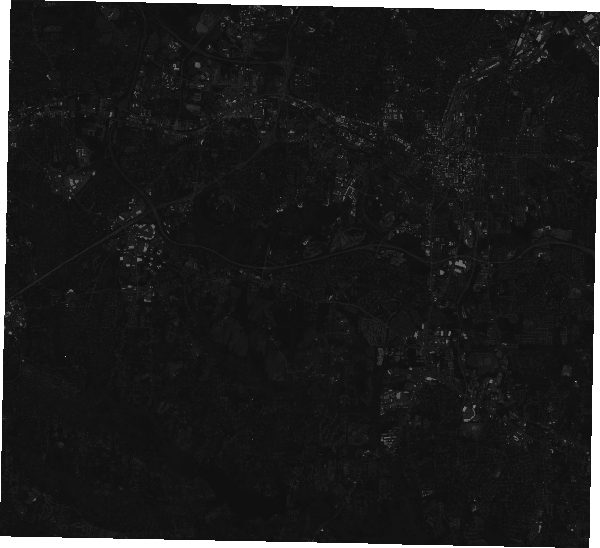

In [56]:
example = gj.Map()
example.d_rast(map="B02_10m") # d.rast map=B02_10m
example.show()

In [77]:
interactive_example = gj.InteractiveMap(width=800)
interactive_example.add_raster("B02_10m")
interactive_example.show()

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [76]:
interactive_example.add_layer_control()
interactive_example.show()

Map(bottom=103365.0, center=[35.750040925, -78.6900029], controls=(ZoomControl(options=['position', 'zoom_in_t…